In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv


In [80]:
data=pd.read_csv('/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv')

In [81]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


In [82]:
# Display the column names of the dataset
column_names = data.columns
print("Column Names:", column_names)


Column Names: Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')


In [83]:
# Display the first few rows of the dataset
print(data.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            36.7           19.3              193.0   
4  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g  year  
0       3750.0  2007  
1       3800.0  2007  
2       3250.0  2007  
3       3450.0  2007  
4       3650.0  2007  


In [84]:
# Print the column names
print(data.columns)


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')


In [85]:
import pandas as pd

# Load your dataset
df = pd.read_csv('/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv')
# Print the column names
print(df.columns)


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')


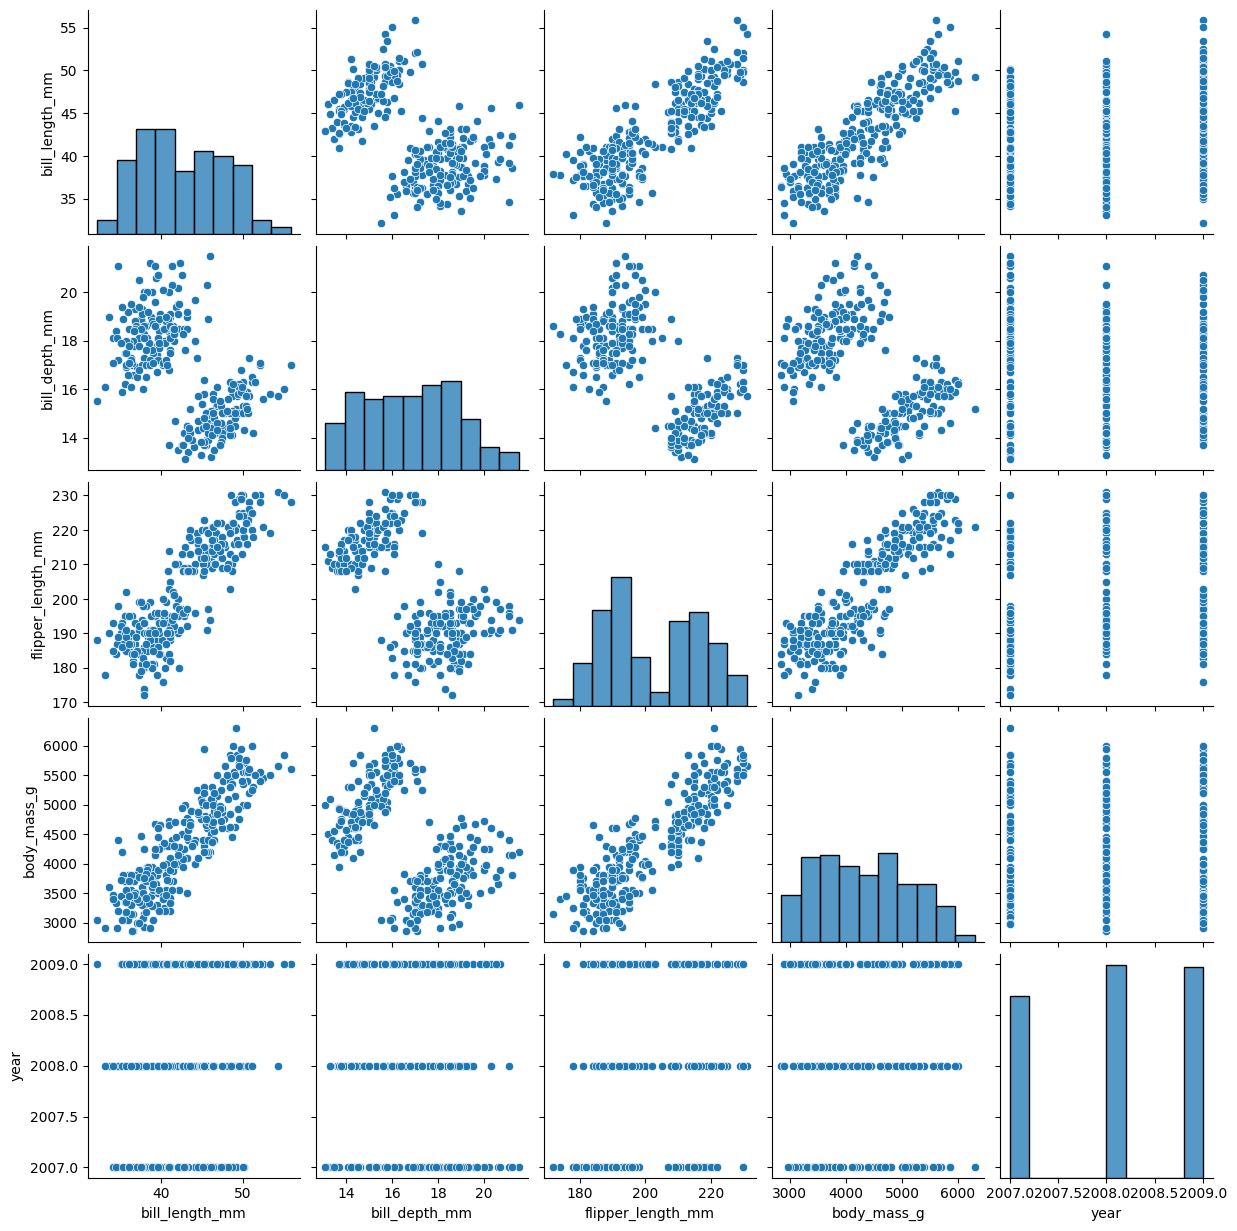

ValueError: could not convert string to float: 'Adelie'

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind, f_oneway

file_path = '/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv'

df = pd.read_csv(file_path)
df = df.dropna()

# Handling outliers using z-score
z_scores = np.abs((df['bill_length_mm'] - df['bill_length_mm'].mean()) / df['bill_length_mm'].std())
df = df[(z_scores < 3)]
sns.pairplot(df)
plt.show()

# Binning Process (if applicable): Example for binning 'bill_length_mm'
df['bill_length_bin'] = pd.cut(df['bill_length_mm'], bins=3, labels=['Small', 'Medium', 'Large'])

# Data Analysis (Descriptive Statistics)
descriptive_stats = df.describe()

# Data Analysis (Covariance matrix and Correlation)
cov_matrix = df.cov()
corr_matrix = df.corr()

# Heatmap for visualizing correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Chi-square Test (Example for 'species' and 'island' columns)
chi2_stat, p_value, _, _ = chi2_contingency(pd.crosstab(df['species'], df['island']))
print(f'Chi-square Statistic: {chi2_stat}, p-value: {p_value}')

# Z-test or t-test (Example for comparing 'body_mass_g' between two groups)
group1 = df[df['some_condition']]['body_mass_g']
group2 = df[~df['some_condition']]['body_mass_g']
t_stat, p_value_t = ttest_ind(group1, group2)
print(f'T-test Statistic: {t_stat}, p-value: {p_value_t}')

# ANOVA (Example for comparing 'flipper_length_mm' among different 'species')
anova_stat, p_value_anova = f_oneway(df[df['species'] == 'Adelie']['flipper_length_mm'],
                                     df[df['species'] == 'Chinstrap']['flipper_length_mm'],
                                     df[df['species'] == 'Gentoo']['flipper_length_mm'])
print(f'ANOVA Statistic: {anova_stat}, p-value: {p_value_anova}')



In [ ]:
 missing_values = df['bill_length_mm'].isnull().sum()
print(f"Number of missing values in 'bill_length_mm' column: {missing_values}")



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

file_path = '/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv'


df = pd.read_csv(file_path)


numeric_data = df.select_dtypes(include=[np.number])

label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])
categorical_data = df[['species_encoded']]

# Combining numerical and categorical data
combined_data = pd.concat([numeric_data, categorical_data], axis=1)

# Calculating descriptive statistics
min_values = combined_data.min()
max_values = combined_data.max()
mean_values = combined_data.mean()
variance_values = combined_data.var()
std_dev_values = combined_data.std()
skewness_values = combined_data.skew()
kurtosis_values = combined_data.kurtosis()

# Output the results
print("Min Values:")
print(min_values)
print("\nMax Values:")
print(max_values)
print("\nMean Values:")
print(mean_values)
print("\nVariance Values:")
print(variance_values)
print("\nStandard Deviation Values:")
print(std_dev_values)
print("\nSkewness Values:")
print(skewness_values)
print("\nKurtosis Values:")
print(kurtosis_values)


In [ ]:
import pandas as pd
import numpy as np


file_path = '/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv'

df = pd.read_csv(file_path)
data = df.select_dtypes(include=[np.number]).values


U, Sigma, VT = np.linalg.svd(data, full_matrices=False)

# U: Left singular vectors
# Sigma: Singular values (diagonal matrix)
# VT: Right singular vectors (transposed)

# Checking the shapes of U, Sigma, and VT
print("Shape of U:", U.shape)
print("Shape of Sigma:", Sigma.shape)
print("Shape of VT:", VT.shape)

# Reconstructing the original matrix using the truncated SVD
# Specify the number of components (k) based on your requirements
k = 3
reconstructed_data = U[:, :k] @ np.diag(Sigma[:k]) @ VT[:k, :]

# Displaying the reconstructed matrix
print("\nReconstructed Matrix:")
print(reconstructed_data)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv')

target_column_name = 'species'
categorical_column_name = 'island'
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[numerical_columns + [categorical_column_name]], df[target_column_name], test_size=0.2, random_state=42)

# Define the categorical features and numerical features
categorical_features = [categorical_column_name]
numerical_features = numerical_columns


In [ ]:

print(y_train.head())
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming 'species' is the column containing string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train['species'])

lda_model = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda_model.fit_transform(X_train, y_train_encoded)

# Now you can create the scatter plot
plt.figure(figsize=(12, 6))

# Mapping species to unique integers for color representation
species_mapping = {'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
colors = y_train['species'].map(species_mapping)

plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=colors, cmap='viridis', edgecolor='k', s=50)
plt.title('Linear Discriminant Analysis (LDA)')
plt.xlabel('LDA Component 1')
plt.yticks([])  # Remove y-axis ticks and labels since there is only one component
plt.show()


In [ ]:
print(df.columns)

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=min(len(numerical_columns), len(df['species'].unique()) - 1))



In [ ]:
import pandas as pd

df = pd.read_csv('/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv')



In [ ]:
import pandas as pd

# Example: Creating a DataFrame
data = {'column1': [1, 2, 3], 'column2': ['a', 'b', 'c']}
df = pd.DataFrame(data)

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline

df = pd.read_csv('/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv')

# Define the target column name
target_column_name = 'species'

# Define numerical feature columns
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(target_column_name, axis=1), df[target_column_name], test_size=0.2, random_state=42)

# PCA with 2 components (you can adjust the number of components here)
n_components_pca = 2
pca = PCA(n_components=n_components_pca)
X_pca = pca.fit_transform(X_train[numerical_columns])

# Linear Discriminant Analysis (LDA) with n_classes - 1 components
n_components_lda = len(df[target_column_name].unique()) - 1
lda = LinearDiscriminantAnalysis(n_components=n_components_lda)
X_lda = lda.fit_transform(X_train[numerical_columns], y_train)

print(len(df[target_column_name].unique()) - 1)
# Plot PCA
plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y_train)[0], cmap='viridis', edgecolor='k', s=50)
plt.title('Principal Component Analysis (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Plot LDA
plt.figure(figsize=(12, 6))
print("Shape of X_lda:", X_lda.shape)
plt.scatter(X_lda[:, 0], X_lda[:, 0], c=pd.factorize(y_train)[0], cmap='viridis', edgecolor='k', s=50)

plt.title('Linear Discriminant Analysis (LDA)')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()


In [ ]:

file_path = '/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv'
import pandas as pd
df = pd.read_csv(file_path)
print("Column names:", df.columns)
print(df.head())


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


file_path = '/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv'
df = pd.read_csv(file_path)


df['is_Adelie'] = (df['species'] == 'Adelie').astype(int)

# Features (X) and target variable (y)
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']]
y = df['is_Adelie']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Naive Bayes model
nb_model = GaussianNB()

# Training the model
nb_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
!pip install pgmpy

import pandas as pd
from sklearn.model_selection import train_test_split
from pgmpy.models import BayesianModel
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.metrics import accuracy_score


file_path = '/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv'
df = pd.read_csv(file_path)
df['is_Adelie'] = (df['species'] == 'Adelie').astype(int)

# Features (X) and target variable (y)
X = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']]
y = df['is_Adelie']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the structure of the Bayesian Network
model = BayesianModel([('bill_length_mm', 'is_Adelie'), ('bill_depth_mm', 'is_Adelie'),
                        ('flipper_length_mm', 'is_Adelie'), ('body_mass_g', 'is_Adelie'),
                        ('year', 'is_Adelie')])

# Estimate the parameters using Maximum Likelihood Estimation
model.fit(df, estimator=MaximumLikelihoodEstimator)

# Predictions using Variable Elimination
inference = VariableElimination(model)
y_pred = []

for index, record in X_test.iterrows():
    query = inference.map_query(variables=['is_Adelie'], evidence=record.to_dict())
    y_pred.append(query['is_Adelie'])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


file_path = '/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv'
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop('species', axis=1)  # Features
y = data['species']  # Target variable

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model with entropy criterion
dt_model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
dt_model_entropy.fit(X_train, y_train)

# Make predictions on the test set
y_pred_entropy = dt_model_entropy.predict(X_test)

# Evaluate the model
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
classification_report_entropy = classification_report(y_test, y_pred_entropy)

# Print the results
print("Decision Tree Model with Entropy:")
print(f"Accuracy: {accuracy_entropy:.4f}")
print("Confusion Matrix:")
print(conf_matrix_entropy)
print("Classification Report:")
print(classification_report_entropy)


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

file_path = '/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv'
data = pd.read_csv(file_path)

# Separatting features and target variable
X = data.drop('species', axis=1)  # Features
y = data['species']  # Target variable

# Converting categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  LDA model
lda_model = LinearDiscriminantAnalysis()

# Trainnig
lda_model.fit(X_train, y_train)

# Making predictions
y_pred_lda = lda_model.predict(X_test)

# Evaluation
accuracy_lda = accuracy_score(y_test, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)
classification_report_lda = classification_report(y_test, y_pred_lda)

#results
print("Linear Discriminant Analysis (LDA) Model:")
print(f"Accuracy: {accuracy_lda:.4f}")
print("Confusion Matrix:")
print(conf_matrix_lda)
print("Classification Report:")
print(classification_report_lda)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


y_train_np = to_categorical(y_train_encoded, num_classes=3)


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Assuming y_train is your original target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Convert to one-hot encoding
y_train_one_hot = to_categorical(y_train_encoded, num_classes=3)

# Convert X_train to a NumPy array and explicitly set data type to float32
X_train_np = np.array(X_train, dtype=np.float32)

# Neural Network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_np.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compilation
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the model
model.fit(X_train_np, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2, verbose=2)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'column_name' is the name of the column you want to encode
column_name = 'species'

# Create a LabelEncoder instance
le = LabelEncoder()

# Use direct column indexing without using '.values' to ensure a pandas Series is obtained
y_train_encoded = le.fit_transform(y_train[:, 0])

# Now 'y_train_encoded' contains the encoded values for the specified column


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



# Splitting the dataset
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_train_np, y_train_encoded, test_size=0.2, random_state=42)

# Initializing the k-NN model with different distance metrics
k_values = [3, 5, 7]
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']

for k in k_values:
    for metric in distance_metrics:
        # k-NN classifier
        knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=metric)

        # Fitting the model
        knn_classifier.fit(X_train_knn, y_train_knn)

        # Making predictions
        y_pred_knn = knn_classifier.predict(X_test_knn)

        # accuracy
        accuracy = accuracy_score(y_test_knn, y_pred_knn)
        print(f'k={k}, Distance Metric={metric}, Accuracy={accuracy:.4f}')


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

#evaluatuon
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import multilabel_confusion_matrix


X_test_np = np.array(X_test)

# Splitting the dataset 
X_train, X_test, y_train, y_test= train_test_split(X_train_np, y_train_encoded, test_size=0.2, random_state=42)

# k-NN model with a specific distance metric and k value
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean') 
# Trainning 
knn_model.fit(X_train, y_train)

# Making predictions
y_pred = knn_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


# Confusion Matrix
conf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Error rate
error_rate = 1 - accuracy
print(f"Error Rate: {error_rate}")

# Precision, Recall, F-measure
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1_measure = f1_score(y_test, y_pred, average='weighted')
print(f"Number of features in training data: {X_train_np.shape[1]}")
print(f"Number of features in test data: {X_test_np.shape[1]}")

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Measure: {f1_measure}")

# ROC Curve and AUC
y_probs = model.predict(X_test_np)


y_probs_class1 = y_probs[:, 1]

# Calculation ROC AUC for binary classification
roc_auc = roc_auc_score(y_test, y_probs_class1)

print(f"ROC AUC: {roc_auc}")

# Plotting ROC Curve for binary classification
fpr, tpr, _ = roc_curve(y_test, y_probs_class1)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

dataset_path = "/kaggle/input/palmer-penguins-for-binary-classification/penguins_binary_classification.csv"
df = pd.read_csv(dataset_path)

#the last column is the target variable and the rest are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Encoding categorical labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting the dataset 
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Initializing the k-NN model with different distance metrics
k_values = [3, 5, 7]
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Trainning
    model.fit(X_train, y_train)
    
    # Evaluation 
    y_pred = model.predict(X_test)
    
    # Printting evaluation metrics
    print(f"\nResults for k={k}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# K-fold cross-validation and average accuracy
k_fold_accuracy = cross_val_score(model, X_encoded, y_encoded, cv=5, scoring='accuracy')
print(f"\nAverage Accuracy (K-fold cross-validation): {k_fold_accuracy.mean()}")


In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TP, TN, FP, FN
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Accuracy: (TP + TN) / (TP + TN + FP + FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Error Rate: (FP + FN) / (TP + TN + FP + FN)
error_rate = (FP + FN) / (TP + TN + FP + FN)

# Precision: TP / (TP + FP)
precision = TP / (TP + FP)

# Recall (Sensitivity or True Positive Rate): TP / (TP + FN)
recall = TP / (TP + FN)

# F1 Score: 2 * (Precision * Recall) / (Precision + Recall)
f1_score = 2 * (precision * recall) / (precision + recall)

# Interpretation
print(f"Accuracy: {accuracy}")
print(f"Error Rate: {error_rate}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")
